# Temporal analysis

The analysis attempts to determine if players are influenced by the moment they played; by the main topic of the moment.


- Extraction of date of each path OK
- Extraction the link subject in each path OK
- Regroup these 2 points to know which are the most used subjects according to a period (by month and by year) IN PROGRESS

            
            
- Create dataset of main event by month TODO:
    - using the wikipedia webpage of each month (ex: https://fr.wikipedia.org/wiki/Ao%C3%BBt_2008)
    - extract which are the poics of interest in each month (as to be the same topic label as the article subject label ex: subject.People.Historical_figures)

- Statistical analysis of the 2 data set (main topic of each month and topic used by player in each month) TODO

In [8]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.contrib import tzip

In [9]:
#path
DATA_PATH = "data/wikispeedia_paths-and-graph/"

In [3]:
df_finished_paths = pd.read_csv(DATA_PATH + "paths_finished.tsv", sep="\t", header = None, skiprows=15, names = [
    'hashedIpAddress',   'timestamp',   'durationInSec',   'path',   'rating',
  ])
df_unfinished_paths = pd.read_csv(DATA_PATH + "paths_unfinished.tsv", sep="\t", header = None, skiprows=16, names = [
    'hashedIpAddress',   'timestamp',   'durationInSec',   'path',   'target'   ,'type'
  ])
# create dataframe with all path
all_paths = pd.concat([df_finished_paths.iloc[:, :4], df_unfinished_paths.iloc[:, :4]], ignore_index=True)
# sorted by temporal order
all_paths.sort_values(by="timestamp", inplace=True)


### Extraction of date of each path

In [4]:
# extract datetime of the path year/ month/ day and hour
all_paths["timestamp"] = [datetime.fromtimestamp(x).strftime("%m,%d,%Y,%I:%M:%S") for x in all_paths["timestamp"]]
all_paths["year"] = [x.split(",")[2] for x in all_paths["timestamp"]]
all_paths["month"] = [x.split(",")[0] for x in all_paths["timestamp"]]
all_paths["day"] = [x.split(",")[1] for x in all_paths["timestamp"]]
all_paths["hour"] = [x.split(",")[3] for x in all_paths["timestamp"]]
all_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,year,month,day,hour
15545,NaN,"08,18,2008,11:29:32",106,Tropical_Storm_Bonnie_%282004%29;Gulf_of_Mexic...,2008,08,18,11:29:32
13719,NaN,"08,18,2008,11:29:32",140,Tyrannosaurus;London;Temperate;Weather;Solar_S...,2008,08,18,11:29:32
10377,NaN,"08,18,2008,11:29:32",96,Heat;Latin;Europe;Italy,2008,08,18,11:29:32
4869,321e4b101c5b58ff,"08,19,2008,12:39:45",91,George_W._Bush;Jesus;Christianity;Roman_Cathol...,2008,08,19,12:39:45
2510,321e4b101c5b58ff,"08,19,2008,12:48:15",81,Brazil;Agriculture;Ethanol;Hydrogen;Chemical_e...,2008,08,19,12:48:15


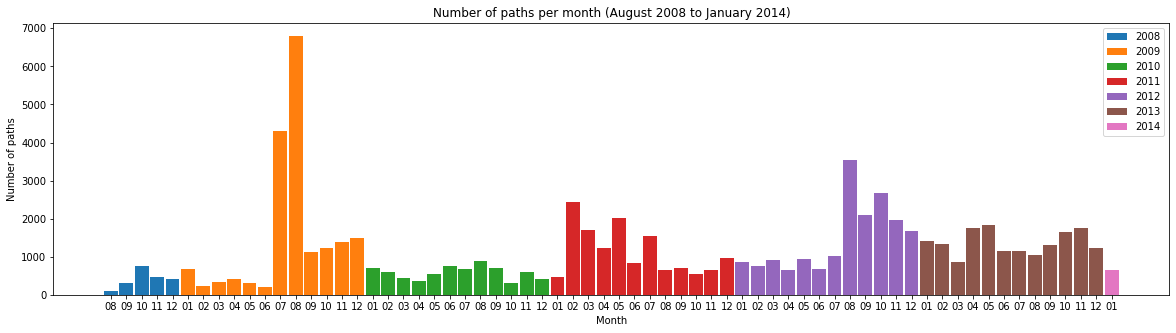

In [5]:
# barplot of the number of path in each month
# groupe by year and month and count
freq_timestamp = all_paths.groupby(["year", "month"], as_index=False).size().reset_index()

# barplot
fig, ax= plt.subplots(1, 1, figsize = (20, 5))
year_color = {"2008": 'lightcoral', "2009": 'lightsalmon', "2010": 'bisque', 
              "2011": 'palegreen', "2012": 'skyblue', "2013": 'lightpink', "2014": 'silver'}
start = 0
for year, color in year_color.items():
    value = freq_timestamp.loc[freq_timestamp["year"] == year]
    b = plt.bar(x = np.arange(start, start + len(value)), height = value["size"], width = 0.9)
    start = start + len(value)
ax.set_xticks(np.arange(66))
ax.set_xticklabels(freq_timestamp["month"])
year_color = {"2008": 'lightcoral', "2009": 'lightsalmon', "2010": 'bisque', 
              "2011": 'palegreen', "2012": 'skyblue', "2013": 'lightpink', "2014": 'silver'}
ax.legend(year_color.keys())
ax.set_title("Number of paths per month (August 2008 to January 2014)")
ax.set_xlabel("Month")
a = ax.set_ylabel("Number of paths")


We can see on the bar plot the temporal distribution of path between August 2008 and January 2014. <br\>
There is a peak in Jully and August 2009. <br\>
Less path in 2010 than in other year. <br\>

### Extraction the link subject in each path OK

In [10]:
# find all categories in each path
''' link_categories = pd.read_csv(DATA_PATH + "categories.tsv", sep="\t", header = None, skiprows=13, names = [
    'article',   'categories'
  ])
different_categories = link_categories["categories"].unique()
cat_dataframe = pd.DataFrame(0, index=all_paths.index, columns=different_categories)
for index, path in tzip(all_paths.index, all_paths["path"]):
    path_split = path.split(";")
    for link in path_split:
        if link != "<":
            link_row = link_categories.loc[link_categories["article"] == link]
            for cat in link_row["categories"]:
                cat_dataframe.loc[index][cat] = cat_dataframe.loc[index][cat] + 1      
cat_dataframe.to_pickle("cat_dataframe.pkl") '''

# just load the dataframe saved in a pickle format (beacause long to create ~ 15 minutes)
cat_dataframe = pd.read_pickle("data/cat_dataframe.pkl")
# a row: index of the path and nb of link with the follwing subject in the path (0 if not)
cat_dataframe.head()

,subject.History.British_History.British_History_1500_and_before_including_Roman_Britain,subject.People.Historical_figures,subject.Countries,subject.Geography.European_Geography.European_Countries,subject.People.Artists,subject.Business_Studies.Currency,subject.History.General_history,subject.History.Military_History_and_War,subject.Science.Physics.Space_Astronomy,subject.Everyday_life.Sports_events,...,subject.History.British_History,subject.IT.Cryptography,subject.Citizenship.Law,subject.History.North_American_History,subject.Citizenship.Culture_and_Diversity,subject.Citizenship.Education,subject.Science.Biology.Evolution_and_reproduction,subject.Science.Chemistry.Materials_science,subject.Science.Physics.The_Planets,subject.Art.Artists
15545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13719,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
10377,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2510,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Regroup these 2 points to know which are the most used subjects according to a period (by month and year)

In [12]:
# count each occurrence of the topic by grouping it by year to be able to find the most popular topics in each year.
all_paths = pd.concat([all_paths, cat_dataframe], join = 'outer', axis = 1)
path_by_date = all_paths.groupby(["year"]).sum()
path_by_date = path_by_date.drop(columns = "durationInSec")
# a row: for each year, the number of occurrences of each subject in a path.
path_by_date.head()

C:\Users\Emilien\AppData\Local\Temp/ipykernel_7440/3914709558.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  path_by_date = all_paths.groupby(["year"]).sum()


,subject.History.British_History.British_History_1500_and_before_including_Roman_Britain,subject.People.Historical_figures,subject.Countries,subject.Geography.European_Geography.European_Countries,subject.People.Artists,subject.Business_Studies.Currency,subject.History.General_history,subject.History.Military_History_and_War,subject.Science.Physics.Space_Astronomy,subject.Everyday_life.Sports_events,...,subject.History.British_History,subject.IT.Cryptography,subject.Citizenship.Law,subject.History.North_American_History,subject.Citizenship.Culture_and_Diversity,subject.Citizenship.Education,subject.Science.Biology.Evolution_and_reproduction,subject.Science.Chemistry.Materials_science,subject.Science.Physics.The_Planets,subject.Art.Artists
year,,,,,,,,,,,,,,,,,,,,,
2008,52,80,1916,629,37,28,209,79,275,26,...,91,3,54,24,43,41,50,49,203,0
2009,1287,813,16266,5750,270,457,2773,1134,2370,399,...,737,65,444,181,459,452,488,310,1481,0
2010,467,267,6072,2200,103,196,908,480,980,155,...,274,16,129,70,192,189,180,86,637,0
2011,1087,431,10446,3769,155,262,2025,694,2144,245,...,483,36,291,112,362,246,267,157,1161,0
2012,1002,459,12351,4448,184,267,2151,662,2282,357,...,616,35,415,122,379,324,367,171,1509,0


## In progress